## Decision Tree & Random Forest
- Import Data
- Decision Tree
- Random Forest

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore')

### Import Data

In [4]:
total = pd.read_csv('0527_final.csv')
df = pd.read_csv('matched_sampling_1_1.csv')
df2 = pd.read_csv('matched_sampling_1_2.csv')

### Decision Tree

In [17]:
remove_these = {'year', 'gvkey', 'coname', 'cusip', 'co_per_rol', 'forced_3', 'departure_code', 'forced_3_4', 'I3y_lag',
       'sic', 'execid', 'becameceo','leftofc', 'Iff1',
       'Iff2', 'Iff3', 'Iff4', 'Iff5', 'Iff6', 'Iff7', 'Iff8', 'Iff9',
       'Iff10', 'Iff11', 'Iff12', 'Iff13', 'Iff14', 'Iff15', 'Iff16',
       'Iff17', 'I1992', 'I1993', 'I1994', 'I1995', 'I1996', 'I1997',
       'I1998', 'I1999', 'I2000', 'I2001', 'I2002', 'I2003', 'I2004',
       'I2005', 'I2006', 'I2007', 'I2008', 'I2009', 'I2010', 'I2011',
       'I2012', 'I2013', 'I2014', 'I2015', 'I2016', 'I2017', 'I2018',
       'I2019', 'I2020', 'I2021', 'I2022', 'Itenure1', 'Itenure2',
       'Itenure3', 'Itenure4', 'Itenure5', 'Itenure6', 'Itenure7', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3'}
all_cols = [x for x in df2.columns.values if x not in remove_these]

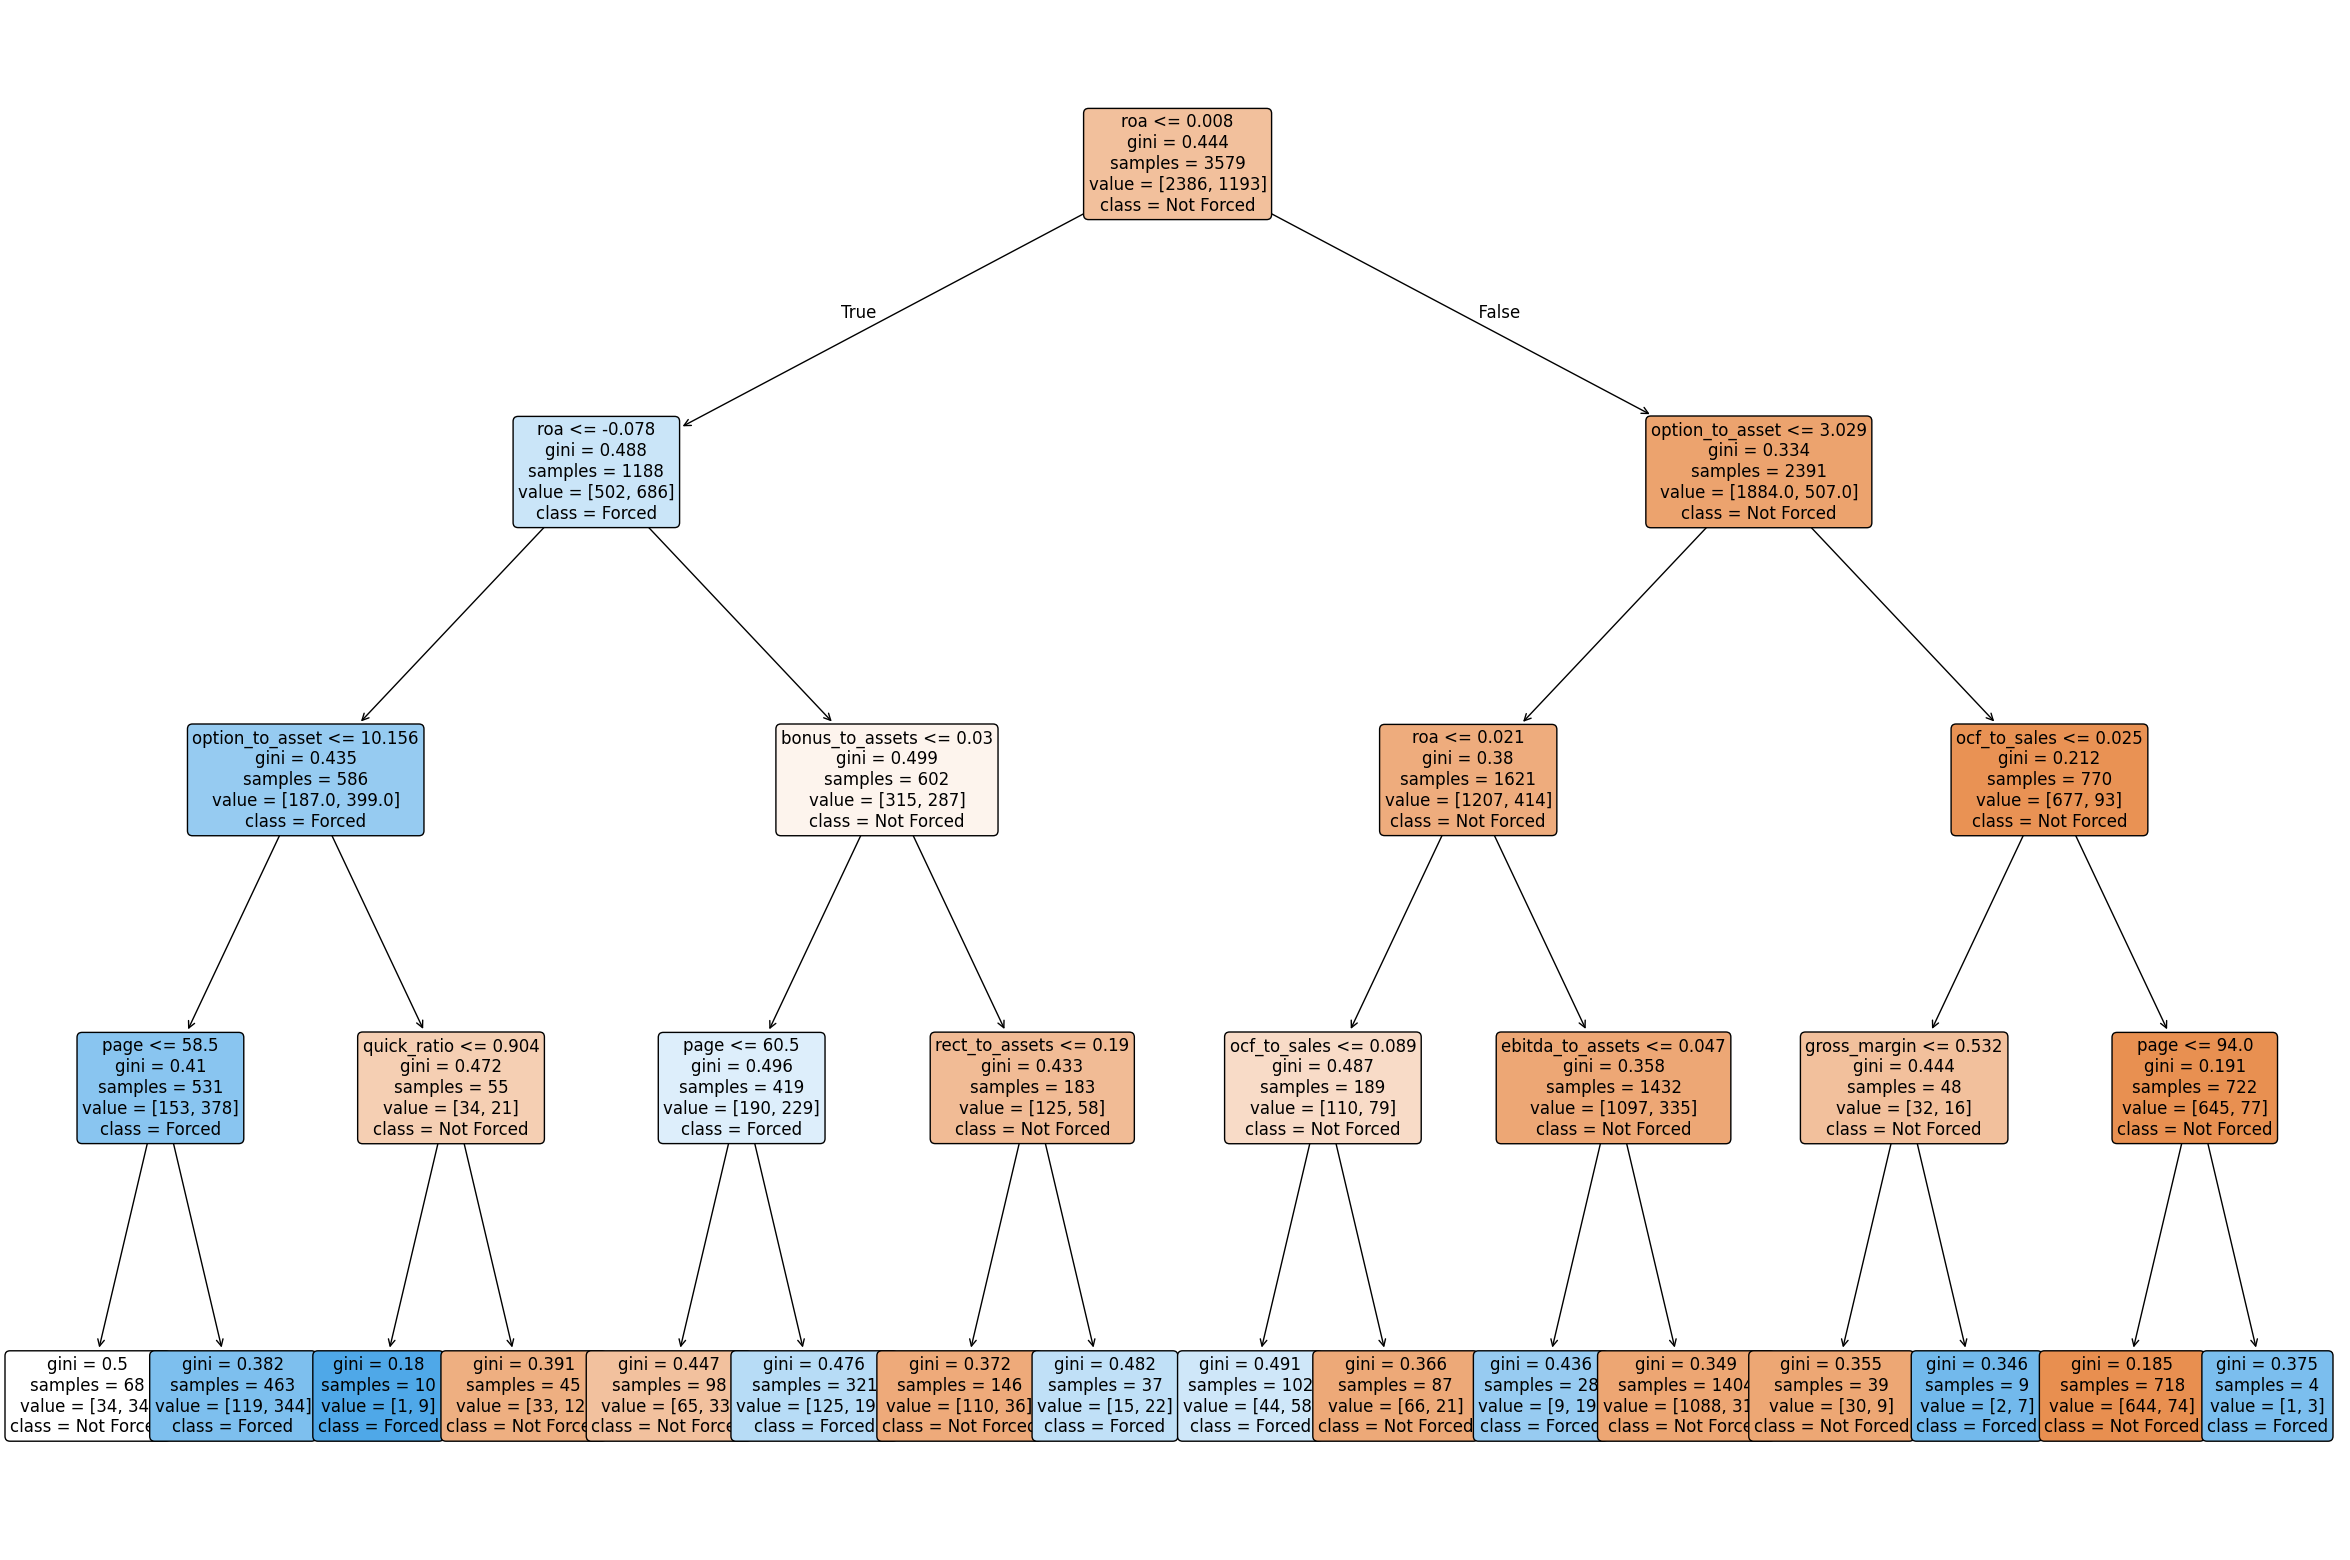

In [ ]:
## Set 1
y_train_tree = df2.loc[df2['train1'] == 1, ['forced_3']].reset_index(drop=True)
X_train_tree = df2.loc[df2['train1'] == 1, all_cols].reset_index(drop=True)

y_test_tree =  df2.loc[df2['test1'] == 1, ['forced_3']].reset_index(drop=True)
X_test_tree = df2.loc[df2['test1'] == 1, all_cols].reset_index(drop=True)

X_tree = pd.concat([X_train_tree, X_test_tree], axis=0)
y_tree = pd.concat([y_train_tree, y_test_tree], axis=0)

X_tree_cleaned = X_tree.replace([np.inf, -np.inf], np.nan)  # inf, -inf → NaN
X_tree_cleaned = X_tree_cleaned.fillna(0)                  # All NaN → 0
X_tree_cleaned = X_tree_cleaned.clip(lower=-1e6, upper=1e6)  # Clip Outliers


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Using Set 1
clf = DecisionTreeClassifier(max_depth=4, random_state=0)  # max_depth는 보기 좋게 4로 제한
clf.fit(X_tree_cleaned, y_tree)

# Visualize Tree 1
plt.figure(figsize=(30, 20)) 
plot_tree(clf, 
          feature_names=X_tree_cleaned.columns, 
          class_names=['Not Forced', 'Forced'], 
          filled=True, 
          rounded=True, 
          fontsize=12)  
plt.show()



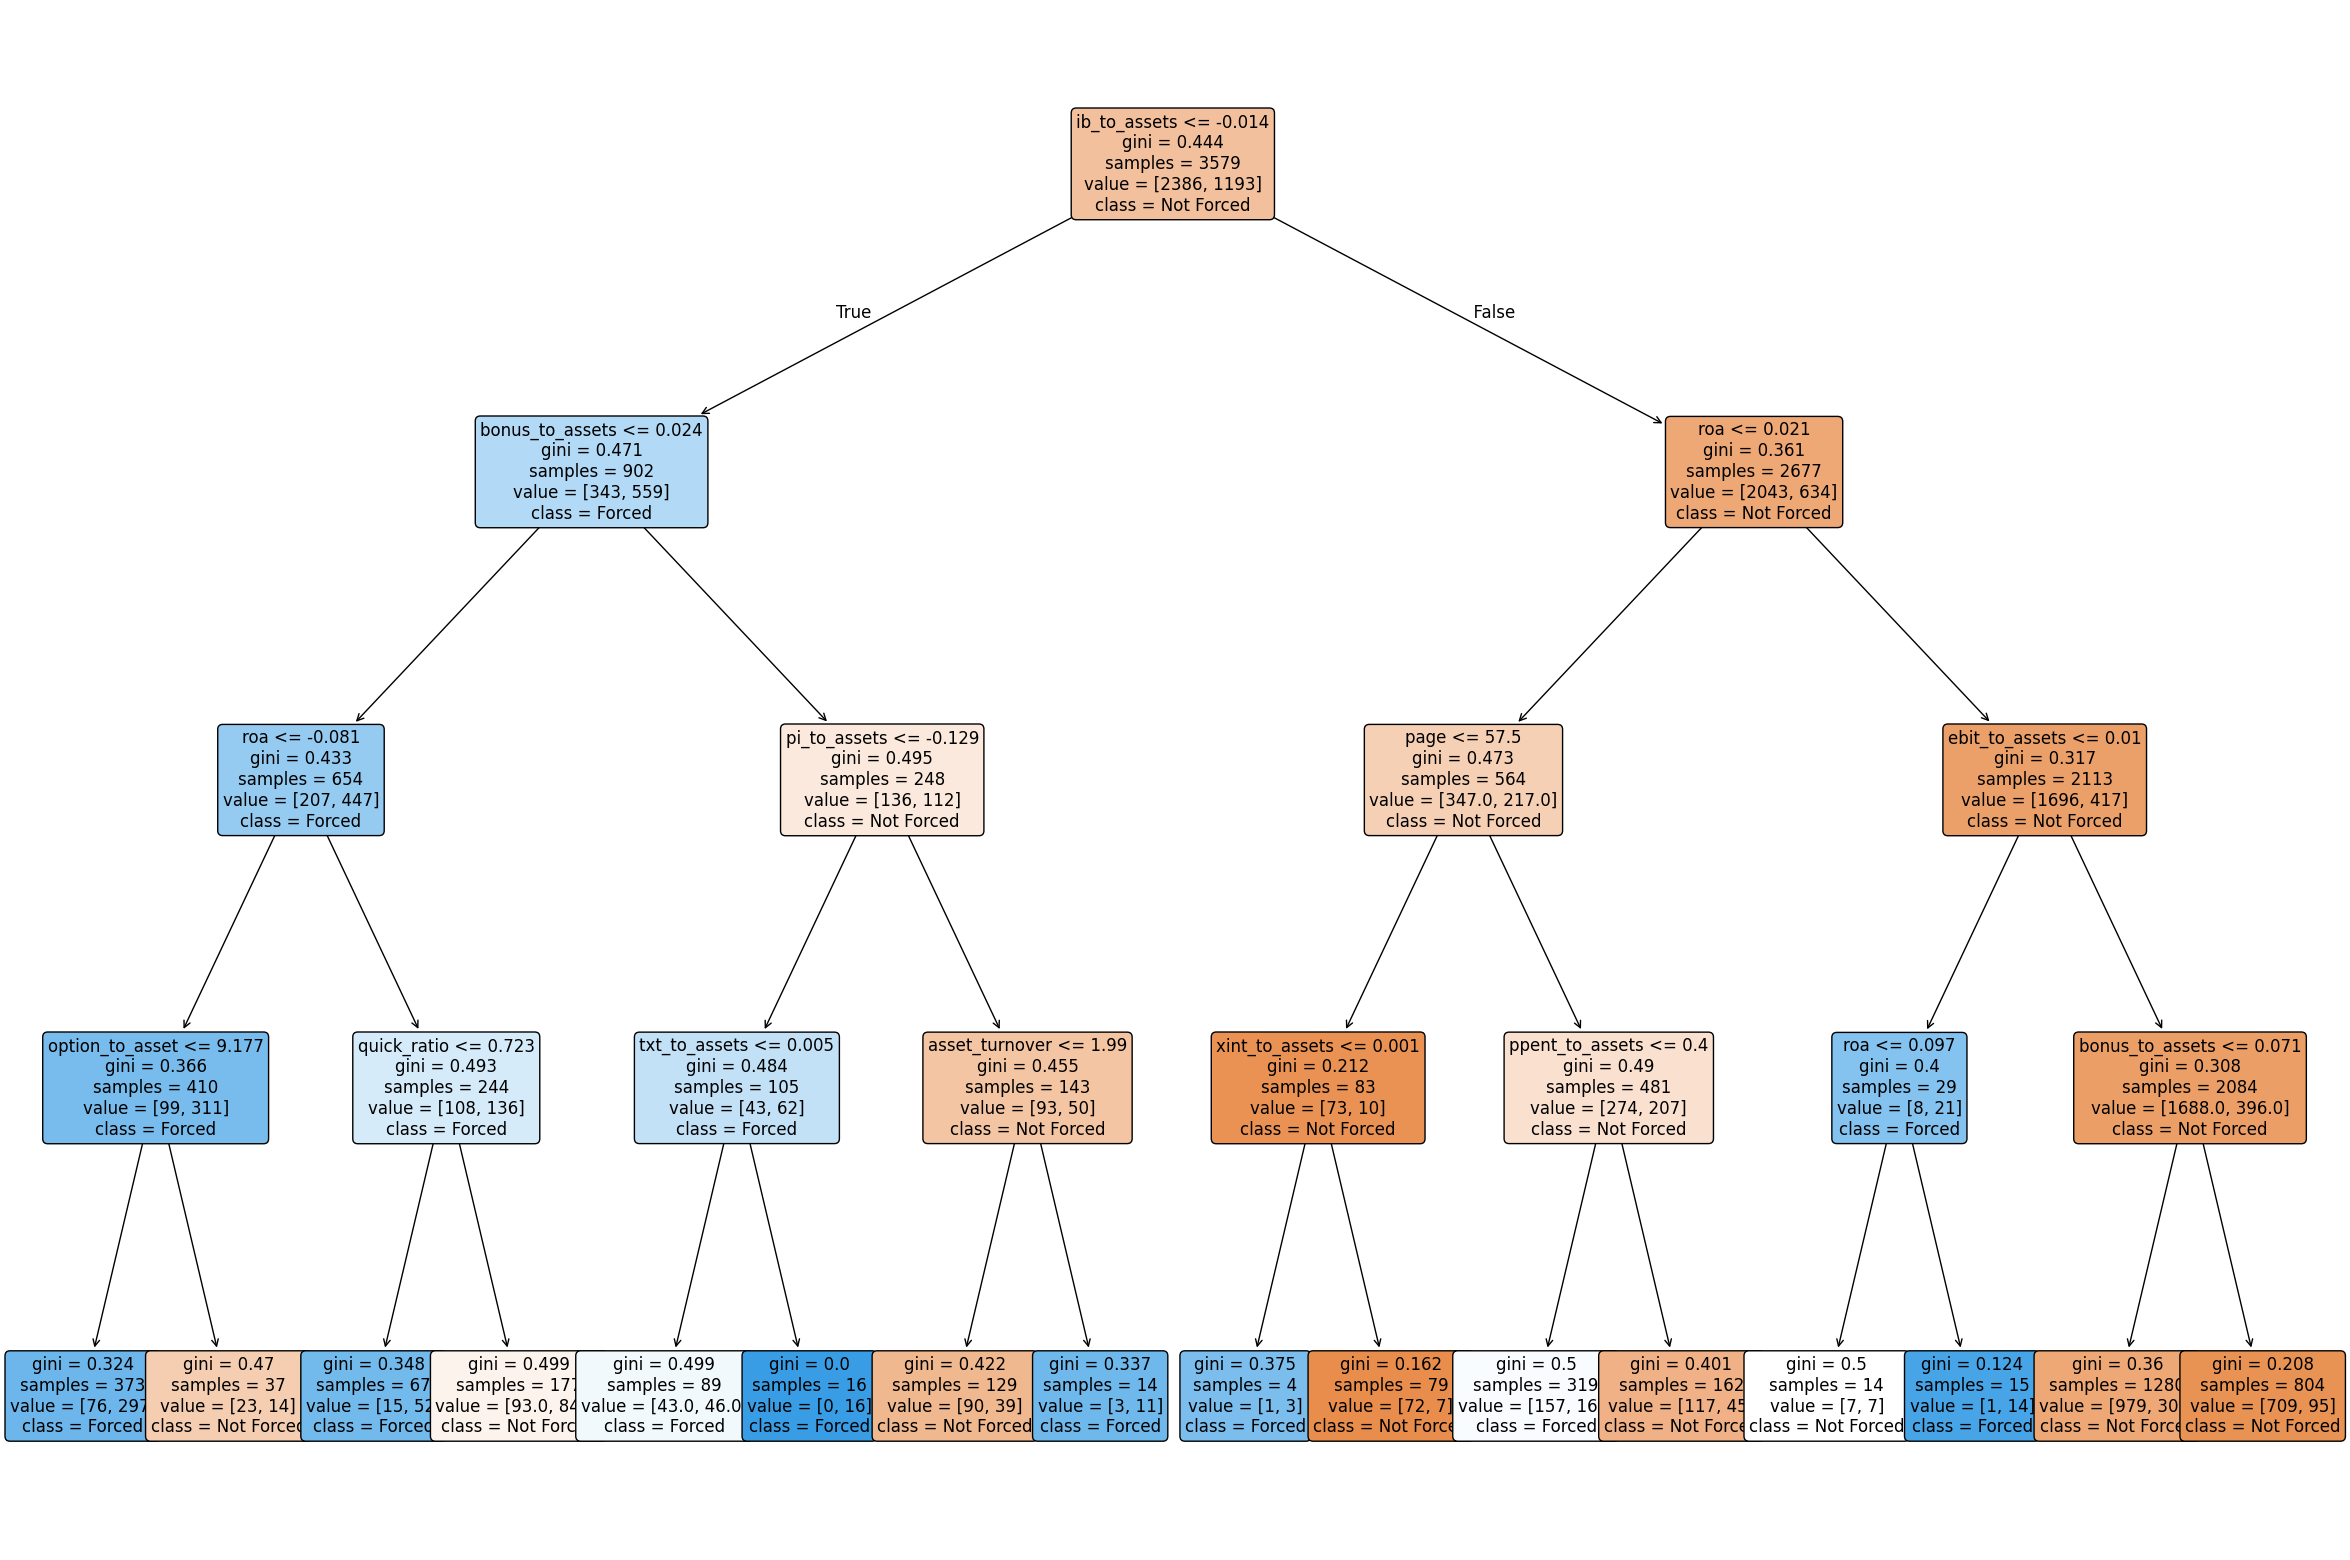

In [ ]:
## Set 2
y_train_tree = df2.loc[df2['train2'] == 1, ['forced_3']].reset_index(drop=True)
X_train_tree = df2.loc[df2['train2'] == 1, all_cols].reset_index(drop=True)

y_test_tree =  df2.loc[df2['test2'] == 1, ['forced_3']].reset_index(drop=True)
X_test_tree = df2.loc[df2['test2'] == 1, all_cols].reset_index(drop=True)

X_tree = pd.concat([X_train_tree, X_test_tree], axis=0)
y_tree = pd.concat([y_train_tree, y_test_tree], axis=0)

X_tree_cleaned = X_tree.replace([np.inf, -np.inf], np.nan)  # inf, -inf → nan
X_tree_cleaned = X_tree_cleaned.fillna(0)                  # All NaN → 0
X_tree_cleaned = X_tree_cleaned.clip(lower=-1e6, upper=1e6)  # Clip outliers


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Using Set 2
clf = DecisionTreeClassifier(max_depth=4, random_state=0)  # max_depth = 4
clf.fit(X_tree_cleaned, y_tree)

# Visualize tree
plt.figure(figsize=(30, 20))  
plot_tree(clf, 
          feature_names=X_tree_cleaned.columns, 
          class_names=['Not Forced', 'Forced'], 
          filled=True, 
          rounded=True, 
          fontsize=12)  
plt.show()

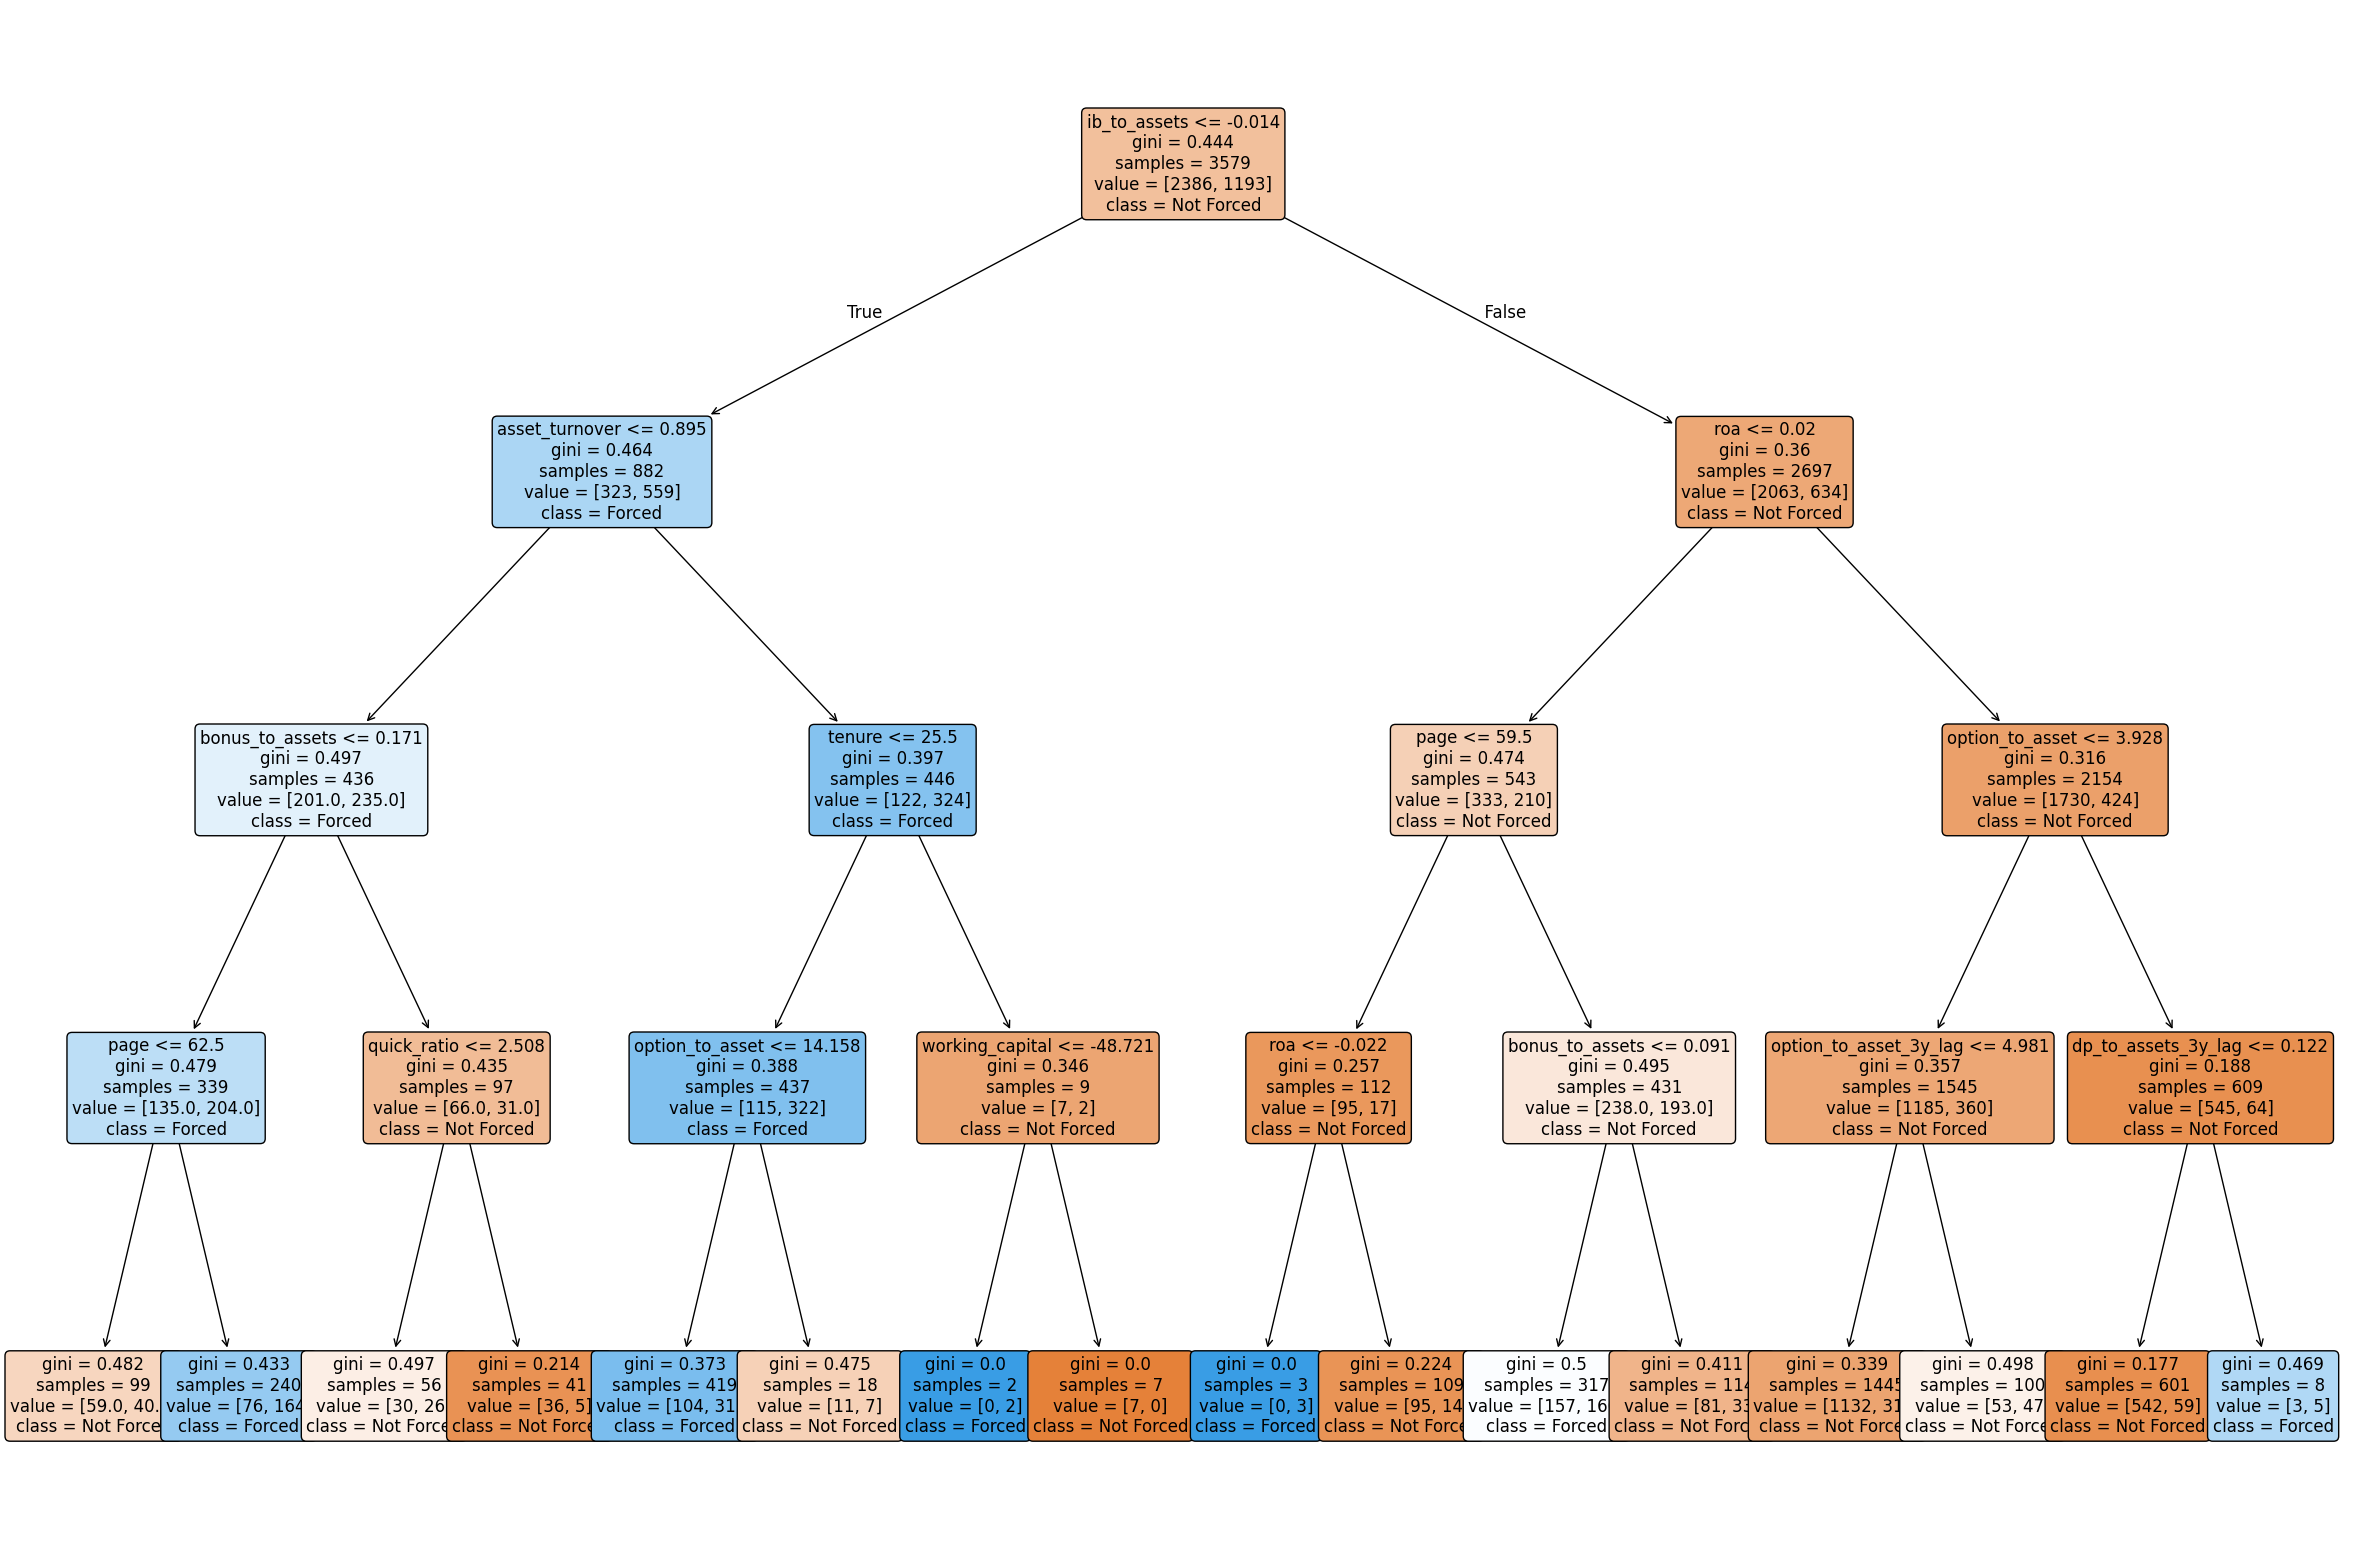

In [ ]:
## Set 3
y_train_tree = df2.loc[df2['train3'] == 1, ['forced_3']].reset_index(drop=True)
X_train_tree = df2.loc[df2['train3'] == 1, all_cols].reset_index(drop=True)

y_test_tree =  df2.loc[df2['test3'] == 1, ['forced_3']].reset_index(drop=True)
X_test_tree = df2.loc[df2['test3'] == 1, all_cols].reset_index(drop=True)

X_tree = pd.concat([X_train_tree, X_test_tree], axis=0)
y_tree = pd.concat([y_train_tree, y_test_tree], axis=0)

X_tree_cleaned = X_tree.replace([np.inf, -np.inf], np.nan)  
X_tree_cleaned = X_tree_cleaned.fillna(0)                  
X_tree_cleaned = X_tree_cleaned.clip(lower=-1e6, upper=1e6) 


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Using Set 3
clf = DecisionTreeClassifier(max_depth=4, random_state=0)  
clf.fit(X_tree_cleaned, y_tree)

# Visualize tree
plt.figure(figsize=(30, 20)) 
plot_tree(clf, 
          feature_names=X_tree_cleaned.columns, 
          class_names=['Not Forced', 'Forced'], 
          filled=True, 
          rounded=True, 
          fontsize=12) 
plt.show()

### Random Forest (Unbalanced)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['forced_3'])[all_cols]
y = df['forced_3'] 

X_cleaned = X.replace([np.inf, -np.inf], np.nan)  # inf, -inf → NaN
X_cleaned = X_cleaned.fillna(0)                  # All NaN → 0
X_cleaned = X_cleaned.clip(lower=-1e6, upper=1e6)  # Clip outliers


# Train/Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42, stratify=y  # stratify=y (preserve class proportions)
)


#### Model Evaluation

In [37]:
rf_clf_all = RandomForestClassifier(random_state = 0, class_weight='balanced')
rf_clf_all.fit(X_train, y_train)
pred_all = rf_clf_all.predict(X_test)
prob_all = rf_clf_all.predict_proba(X_test)[:, 1]

In [41]:
accuracy_all = accuracy_score(y_test, pred_all)
precision_all = precision_score(y_test, pred_all)
recall_all = recall_score(y_test, pred_all)
f1_all = f1_score(y_test, pred_all)

roc_auc_all = roc_auc_score(y_test, prob_all)

print("Model Evaluation Metrics (Random Forest)")
print("=========================================")
print(f"Accuracy               : {accuracy_all:.4f}")
print(f"Precision              : {precision_all:.4f}")
print(f"Recall                 : {recall_all:.4f}")
print(f"F1 Score               : {f1_all:.4f}")
print(f"ROC AUC                : {roc_auc_all:.4f}")

Model Evaluation Metrics (Random Forest)
Accuracy               : 0.9681
Precision              : 0.0000
Recall                 : 0.0000
F1 Score               : 0.0000
ROC AUC                : 0.7560


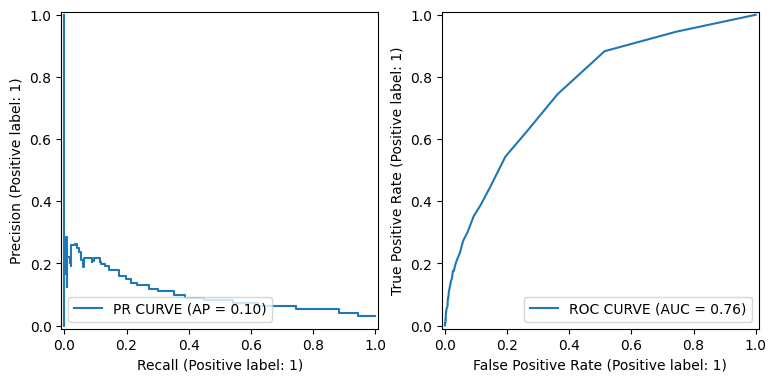

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))  
PrecisionRecallDisplay.from_estimator(rf_clf_all, X_test, y_test, ax=axes[0], name="PR CURVE")
RocCurveDisplay.from_estimator(rf_clf_all, X_test, y_test, ax=axes[1], name="ROC CURVE")

Although the AUC suggests some predictive power in the probabilities, there are no cases exceeding the threshold. Precision, Recall, and F1 Score are all 0.

In [43]:
## Threshold 0.1

pred_custom = (rf_clf_all.predict_proba(X_test)[:,1] > 0.1).astype(int)

accuracy_all = accuracy_score(y_test, pred_custom)
precision_all = precision_score(y_test, pred_custom)
recall_all = recall_score(y_test, pred_custom)
f1_all = f1_score(y_test, pred_custom)

roc_auc_all = roc_auc_score(y_test, prob_all)

print("Model Evaluation Metrics (Random Forest)")
print("=========================================")
print(f"Accuracy               : {accuracy_all:.4f}")
print(f"Precision              : {precision_all:.4f}")
print(f"Recall                 : {recall_all:.4f}")
print(f"F1 Score               : {f1_all:.4f}")
print(f"ROC AUC                : {roc_auc_all:.4f}")

Model Evaluation Metrics (Random Forest)
Accuracy               : 0.9288
Precision              : 0.1356
Recall                 : 0.2343
F1 Score               : 0.1718
ROC AUC                : 0.7560


Lowering the threshold to 0.1 improved recall, but the performance can be further improved using matched case control sampling.

### Random Forest (Matched Case Control Sampling)

In [ ]:

## Split Data
def split_xy(df, set_num, label_type, boost_cols):
    """
    df: DataFrame 
    set_num: int (1, 2, 3)
    label_type: str ('3' or '3_4')
    boost_cols: list of feature column names
    """
    train_flag = f'train{set_num}'
    test_flag = f'test{set_num}'
    label_col = f'forced_{label_type}'

    X_train = df.loc[df[train_flag] == 1, boost_cols].reset_index(drop=True)
    y_train = df.loc[df[train_flag] == 1, label_col].reset_index(drop=True)
    
    X_test = df.loc[df[test_flag] == 1, boost_cols].reset_index(drop=True)
    y_test = df.loc[df[test_flag] == 1, label_col].reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test


# Set 1
X_train_1, X_test_1, y_train_1, y_test_1 = split_xy(df2, 1, '3', all_cols)
# Set 2
X_train_2, X_test_2, y_train_2, y_test_2 = split_xy(df2, 2, '3', all_cols)
# Set 3
X_train_3, X_test_3, y_train_3, y_test_3 = split_xy(df2, 3, '3', all_cols)




In [ ]:
## Wrangling

X_sets = ['X_train_1', 'X_train_2', 'X_train_3', 'X_test_1', 'X_test_2', 'X_test_3']

for name in X_sets:
    X = globals()[name]  # 변수명을 문자열로 불러오기
    X_cleaned = X.replace([np.inf, -np.inf], np.nan)
    X_cleaned = X_cleaned.fillna(0)
    X_cleaned = X_cleaned.clip(lower=-1e6, upper=1e6)
    globals()[name] = X_cleaned  # 원래 변수에 덮어쓰기

In [ ]:
## Results

def train_evaluate_rf(X_train, X_test, y_train, y_test, set_name=""):
    # Train Model
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    roc_auc   = roc_auc_score(y_test, y_proba)

    # Print results
    print(f"Model Evaluation Metrics (Random Forest) {set_name}")
    print("=" * 45)
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Precision  : {precision:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print()

    return model, y_pred



In [49]:
model_1_3, pred_1_3 = train_evaluate_rf(X_train_1, X_test_1, y_train_1, y_test_1, set_name="Set 1 (3)")
model_2_3, pred_2_3 = train_evaluate_rf(X_train_2, X_test_2, y_train_2, y_test_2, set_name="Set 2 (3)")
model_3_3, pred_3_3 = train_evaluate_rf(X_train_3, X_test_3, y_train_3, y_test_3, set_name="Set 3 (3)")

Model Evaluation Metrics (Random Forest) Set 1 (3)
Accuracy   : 0.7360
Precision  : 0.6524
Recall     : 0.4477
ROC AUC    : 0.7435

Model Evaluation Metrics (Random Forest) Set 2 (3)
Accuracy   : 0.7542
Precision  : 0.7203
Recall     : 0.4310
ROC AUC    : 0.7840

Model Evaluation Metrics (Random Forest) Set 3 (3)
Accuracy   : 0.7304
Precision  : 0.6402
Recall     : 0.4393
ROC AUC    : 0.7355



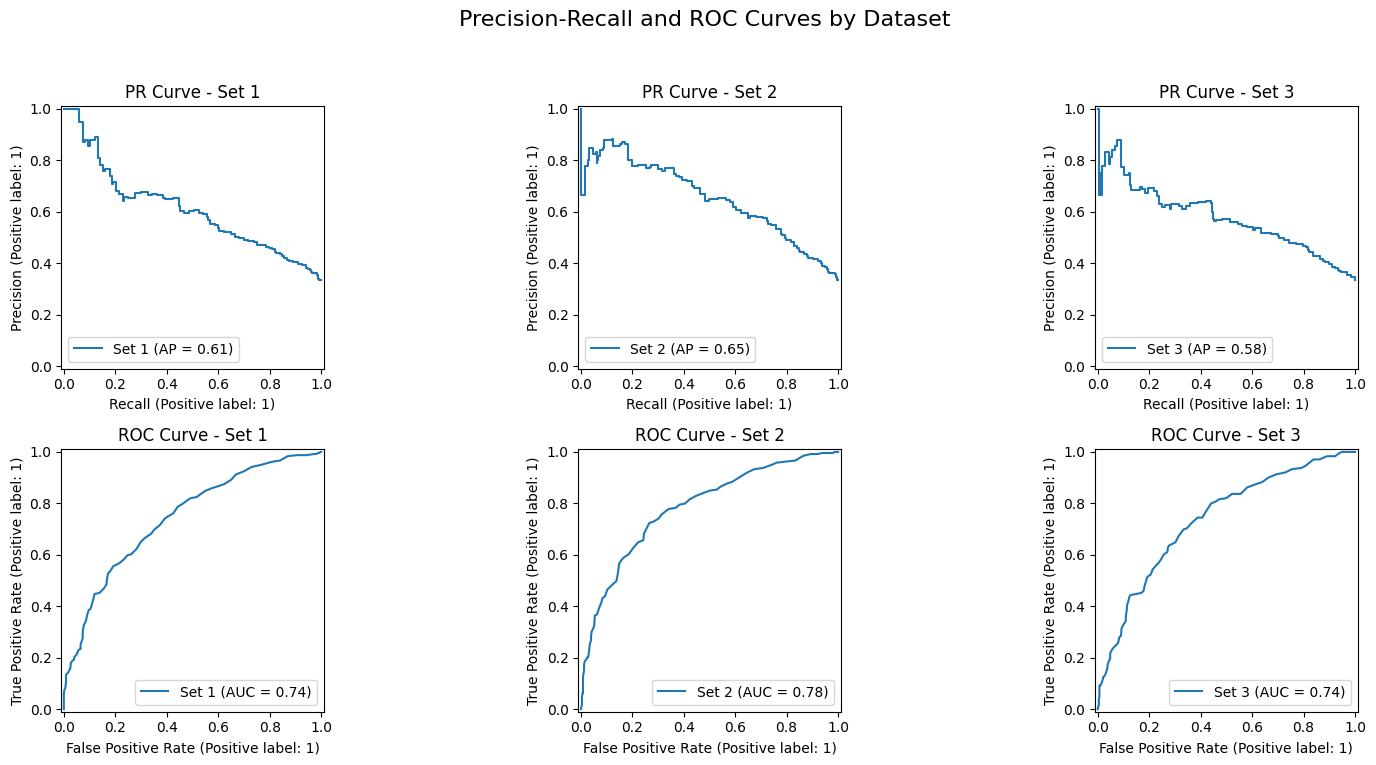

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # 2 rows, 3 columns

# === PR Curves ===
PrecisionRecallDisplay.from_estimator(model_1_3,  X_test_1, y_test_1,  ax=axes[0, 0], name="Set 1")
PrecisionRecallDisplay.from_estimator(model_2_3,  X_test_2, y_test_2,  ax=axes[0, 1], name="Set 2")
PrecisionRecallDisplay.from_estimator(model_3_3,  X_test_3, y_test_3,  ax=axes[0, 2], name="Set 3")

for i in range(3):
    axes[0, i].set_title(f"PR Curve - Set {i + 1}")


# === ROC Curves ===
RocCurveDisplay.from_estimator(model_1_3, X_test_1, y_test_1, ax=axes[1, 0], name="Set 1")
RocCurveDisplay.from_estimator(model_2_3, X_test_2, y_test_2, ax=axes[1, 1], name="Set 2")
RocCurveDisplay.from_estimator(model_3_3, X_test_3, y_test_3, ax=axes[1, 2], name="Set 3")

for i in range(3):
    axes[1, i].set_title(f"ROC Curve - Set {i + 1}")

plt.suptitle("Precision-Recall and ROC Curves by Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Random Forest Boosting

In [59]:
### Variables

boost_exec = [
    "gender",
    "bonus_to_assets",
    "option_to_asset",
    "page",
    "tenure",
    "salary_to_assets",
    "tdc1_to_assets",
    "emp_to_assets"
]

boost_firm = [
    "ib_to_assets",
    "pi_to_assets",
    "capx_to_assets",
    "rect_to_assets",
    "dp_to_assets",
    "ppent_to_assets",
    "ebit_to_assets",
    "xint_to_assets",
    "re_to_assets",
    "ebitda_to_assets",
    "txt_to_assets"
]

boost_cols = boost_exec + boost_firm


In [ ]:
# Set 1
X_train_b1, X_test_b1, y_train_b1, y_test_b1 = split_xy(df2, 1, '3', boost_cols)
# Set 2
X_train_b2, X_test_b2, y_train_b2, y_test_b2 = split_xy(df2, 2, '3', boost_cols)
# Set 3
X_train_b3, X_test_b3, y_train_b3, y_test_b3 = split_xy(df2, 3, '3', boost_cols)

## Wrangling

X_sets = ['X_train_b1', 'X_train_b2', 'X_train_b3', 'X_test_b1', 'X_test_b2', 'X_test_b3']

for name in X_sets:
    X = globals()[name]  
    X_cleaned = X.replace([np.inf, -np.inf], np.nan)
    X_cleaned = X_cleaned.fillna(0)
    X_cleaned = X_cleaned.clip(lower=-1e6, upper=1e6)
    globals()[name] = X_cleaned  

Best combination across sets:
  num_features : 14.0
  exec_k       : 8.0
  firm_k       : 6.0
  max_depth    : 7.0
  cv_auc       : 0.776338


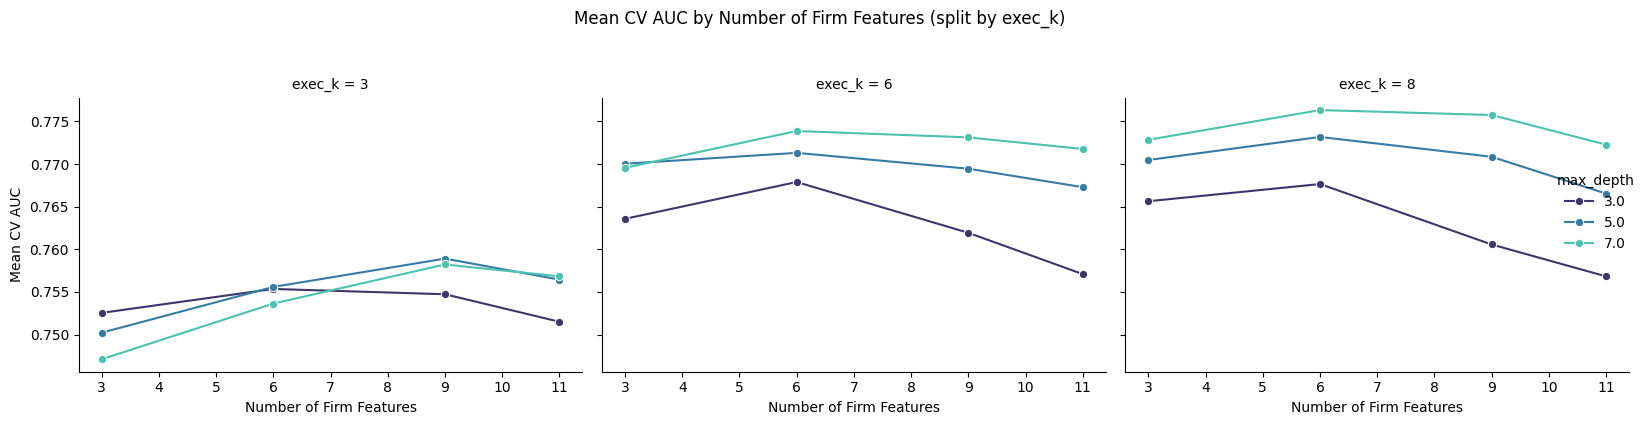

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exec_ks = [3, 6, 8]     # Number of Executive Variables to be used
firm_ks = [3, 6, 9, 11]     # Number of Firm Variables to be used
depths = [3, 5, 7, None]

results = []

for e in exec_ks:
    for f in firm_ks:
        selected_features = boost_exec[:e] + boost_firm[:f]

        auc_dict = {}

        for d in depths:
            auc_scores = []

            for i in [1, 2, 3]:
                X_train = eval(f"X_train_b{i}")[selected_features].copy()
                X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0).clip(-1e6, 1e6).astype(np.float32)
                y_train = eval(f"y_train_b{i}").values.ravel()

                model = RandomForestClassifier(max_depth=d, random_state=0)
                auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
                auc_scores.append(auc)

            mean_auc = sum(auc_scores) / len(auc_scores)
            results.append({
                'exec_k': e,
                'firm_k': f,
                'max_depth': d,
                'mean_cv_auc': mean_auc
            })

# Results
df_results = pd.DataFrame(results)

# Number of total features used
df_results["num_features"] = df_results["exec_k"] + df_results["firm_k"]

# Find best combination
best_row = df_results.loc[df_results["mean_cv_auc"].idxmax()]

print("Best combination across sets:")
print(f"  num_features : {best_row['num_features']}")
print(f"  exec_k       : {best_row['exec_k']}")
print(f"  firm_k       : {best_row['firm_k']}")
print(f"  max_depth    : {best_row['max_depth']}")
print(f"  cv_auc       : {best_row['mean_cv_auc']:.6f}")

g = sns.FacetGrid(
    df_results,
    col="exec_k",
    hue="max_depth",
    height=4,
    aspect=1.3,
    palette="mako"
)

g.map(sns.lineplot, "firm_k", "mean_cv_auc", marker="o")

# Plot Title & Axis
g.set_titles("exec_k = {col_name}")
g.set_axis_labels("Number of Firm Features", "Mean CV AUC")
g.add_legend(title="max_depth")

plt.suptitle("Mean CV AUC by Number of Firm Features (split by exec_k)", y=1.05)
plt.tight_layout()
plt.show()

### Final Model Results

In [64]:
final_cols = boost_exec + boost_firm[:6]

In [65]:
X_train_b1[final_cols]

,gender,bonus_to_assets,option_to_asset,page,tenure,salary_to_assets,tdc1_to_assets,emp_to_assets,ib_to_assets,pi_to_assets,capx_to_assets,rect_to_assets,dp_to_assets,ppent_to_assets
0,1,0.000000,0.000000,78.0,5,0.026799,0.336036,0.003621,-0.083358,-0.127532,0.062147,0.048931,0.045132,0.650676
1,1,0.701530,2.582651,67.0,7,1.025313,2.839381,0.011009,0.074243,0.111008,0.027001,0.110955,0.026316,0.172750
2,1,0.026272,0.278742,84.0,10,0.068416,0.448675,0.014616,0.047581,0.079239,0.110151,0.036261,0.062259,0.598458
3,1,0.167143,3.241811,78.0,4,0.167143,0.730940,0.005813,0.030623,0.050677,0.027232,0.176209,0.022017,0.052717
4,1,0.000000,0.000000,80.0,6,0.121276,0.242528,0.007410,-0.014447,-0.012905,0.036907,0.281190,0.035229,0.064535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1,0.000000,0.192200,68.0,3,0.089993,0.351395,0.017272,-0.006318,-0.009241,0.028368,0.123268,0.034418,0.182681
2859,1,0.000000,9.289506,66.0,8,0.123760,1.234320,0.020639,0.032654,0.040489,0.036625,0.134102,0.039195,0.158832
2860,1,0.000000,0.000000,61.0,1,0.000000,0.000000,0.000163,0.031287,0.029179,0.073661,0.030505,0.038089,0.831491
2861,0,0.691250,0.000000,52.0,2,0.144078,0.837303,0.000502,0.054750,0.050589,0.015794,0.037581,0.013817,0.054676


In [ ]:
def final_rf(X_train, X_test, y_train, y_test, set_name=""):
    # Train model
    model = RandomForestClassifier(random_state=0, max_depth= 7)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    roc_auc   = roc_auc_score(y_test, y_proba)

    # Print results
    print(f"Model Evaluation Metrics (Random Forest) {set_name}")
    print("=" * 45)
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Precision  : {precision:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print()

    return model, y_pred

model_1, pred_1 = final_rf(X_train_b1[final_cols], X_test_b1[final_cols], y_train_b1, y_test_b1, set_name="Set 1")
model_2, pred_2 = final_rf(X_train_b2[final_cols], X_test_b2[final_cols], y_train_b2, y_test_b2, set_name="Set 2")
model_3, pred_3 = final_rf(X_train_b3[final_cols], X_test_b3[final_cols], y_train_b3, y_test_b3, set_name="Set 3")

Model Evaluation Metrics (Random Forest) Set 1
Accuracy   : 0.7179
Precision  : 0.6057
Recall     : 0.4435
ROC AUC    : 0.7559

Model Evaluation Metrics (Random Forest) Set 2
Accuracy   : 0.7640
Precision  : 0.7431
Recall     : 0.4477
ROC AUC    : 0.7873

Model Evaluation Metrics (Random Forest) Set 3
Accuracy   : 0.7165
Precision  : 0.6154
Recall     : 0.4017
ROC AUC    : 0.7503



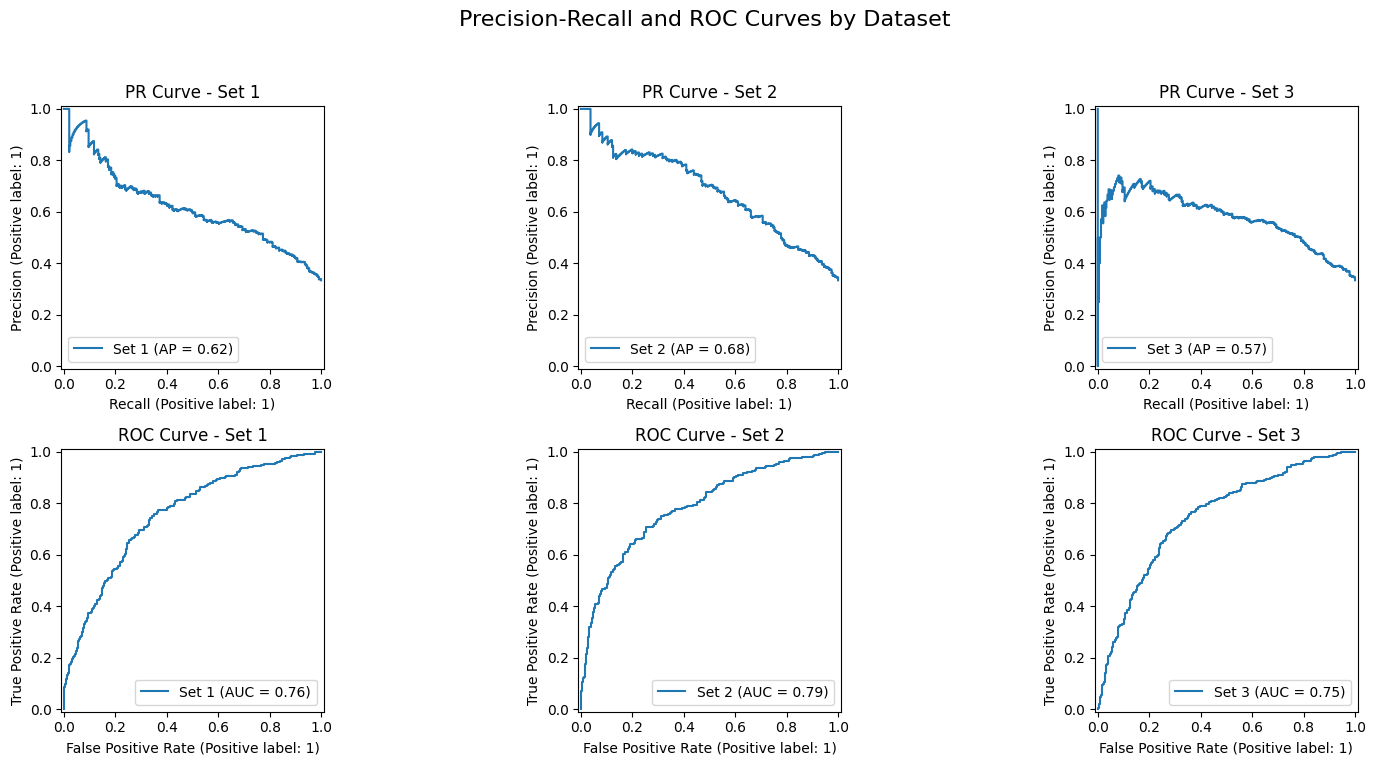

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # 2 rows, 3 columns

# === PR Curves ===
PrecisionRecallDisplay.from_estimator(model_1,  X_test_b1[final_cols], y_test_b1,  ax=axes[0, 0], name="Set 1")
PrecisionRecallDisplay.from_estimator(model_2,  X_test_b2[final_cols], y_test_b2,  ax=axes[0, 1], name="Set 2")
PrecisionRecallDisplay.from_estimator(model_3,  X_test_b3[final_cols], y_test_b3,  ax=axes[0, 2], name="Set 3")

for i in range(3):
    axes[0, i].set_title(f"PR Curve - Set {i + 1}")


# === ROC Curves ===

RocCurveDisplay.from_estimator(model_1,  X_test_b1[final_cols], y_test_b1,  ax=axes[1, 0], name="Set 1")
RocCurveDisplay.from_estimator(model_2,  X_test_b2[final_cols], y_test_b2,  ax=axes[1, 1], name="Set 2")
RocCurveDisplay.from_estimator(model_3,  X_test_b3[final_cols], y_test_b3,  ax=axes[1, 2], name="Set 3")


for i in range(3):
    axes[1, i].set_title(f"ROC Curve - Set {i + 1}")

plt.suptitle("Precision-Recall and ROC Curves by Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_2,
    X_test_b2[final_cols],          
    y_test_b2,
    n_repeats=30,    
    random_state=0,
    n_jobs=-1        
)

# The results as dataframe
perm_df = pd.DataFrame({
    'feature': X_test_b2[final_cols].columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(perm_df.head(10))

            feature  importance_mean  importance_std
8      ib_to_assets         0.039153        0.008741
9      pi_to_assets         0.030307        0.007531
2   option_to_asset         0.013966        0.006775
3              page         0.013128        0.007154
1   bonus_to_assets         0.006006        0.005646
7     emp_to_assets         0.005214        0.004970
4            tenure         0.005121        0.004133
12     dp_to_assets         0.004236        0.003597
11   rect_to_assets         0.003724        0.003024
6    tdc1_to_assets         0.003305        0.003597


In [ ]:
# List for saving results
importances_list = []

# Repeat for Set 1, 2, 3:
for X_train, X_test, y_train, y_test in [(X_train_1, X_test_1, y_train_1, y_test_1),
                                         (X_train_2, X_test_2, y_train_2, y_test_2),
                                         (X_train_3, X_test_3, y_train_3, y_test_3)]:

    # Train Model
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)

    # Compute permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    # Save as DataFrame
    df_imp = pd.DataFrame({
        'feature': X_test.columns,
        'importance': result.importances_mean,
        'importance_std': result.importances_std
    })

    importances_list.append(df_imp)

# Average all results
df_mean = pd.concat(importances_list).groupby('feature').mean().sort_values(by='importance', ascending=False).reset_index()

# Print results
print(df_mean.head(10))


           feature  importance  importance_std
0              roa    0.014199        0.004696
1             page    0.013920        0.004198
2  bonus_to_assets    0.011406        0.004391
3           tenure    0.010708        0.003421
4  option_to_asset    0.009916        0.004963
5     pi_to_assets    0.009358        0.004747
6   asset_turnover    0.009264        0.003820
7     ocf_to_sales    0.008147        0.003675
8  working_capital    0.007263        0.003146
9      quick_ratio    0.007123        0.003241


In [ ]:
# List for saving results
importances_list = []

# Repeat for Set 1, 2, 3:
for X_train, X_test, y_train, y_test in [(X_train_b1, X_test_b1, y_train_b1, y_test_b1),
                                         (X_train_b2, X_test_b2, y_train_b2, y_test_b2),
                                         (X_train_b3, X_test_b3, y_train_b3, y_test_b3)]:

    # Train Model
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[final_cols], y_train)

    # Compute permutation importance
    result = permutation_importance(model, X_test[final_cols], y_test, n_repeats=10, random_state=0)

    # Save as DataFrame
    df_imp = pd.DataFrame({
        'feature': X_test[final_cols].columns,
        'importance': result.importances_mean,
        'importance_std': result.importances_std
    })

    importances_list.append(df_imp)

# Average all results
df_mean = pd.concat(importances_list).groupby('feature').mean().sort_values(by='importance', ascending=False).reset_index()

# Print output
print(df_mean.head(10))


            feature  importance  importance_std
0      ib_to_assets    0.025838        0.007876
1              page    0.014106        0.008006
2      pi_to_assets    0.012849        0.006473
3   option_to_asset    0.011685        0.006376
4   bonus_to_assets    0.011080        0.006360
5            tenure    0.009404        0.005124
6     emp_to_assets    0.007775        0.004338
7    rect_to_assets    0.003957        0.004375
8  salary_to_assets    0.001490        0.004698
9   ppent_to_assets    0.000978        0.003730


ROA and IB-to-Assets appear as the most important feature in one of the results, are not included in the other. This is because the correlation of the two features approach 1-proving that they represent almost identical information of the firm's financial performance.

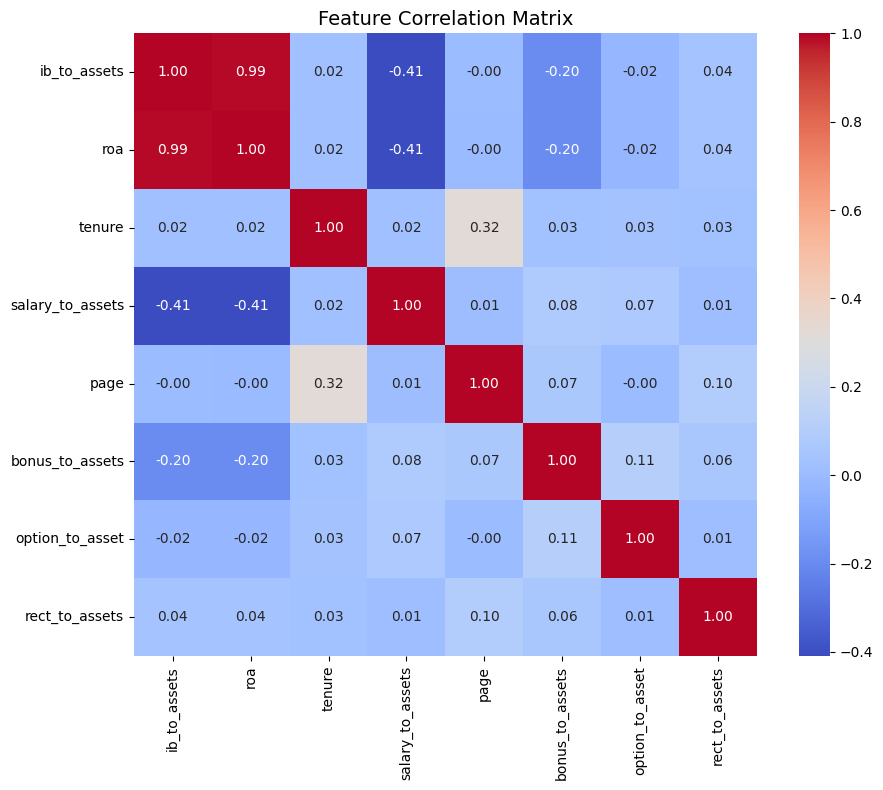

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[['ib_to_assets', 'roa', 'tenure', 'salary_to_assets', 'page', 'bonus_to_assets', 'option_to_asset', 'rect_to_assets']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()
